<a href="https://colab.research.google.com/github/pkubota/courses/blob/main/python/colab/aulas_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ValueError: unknown file extension: 

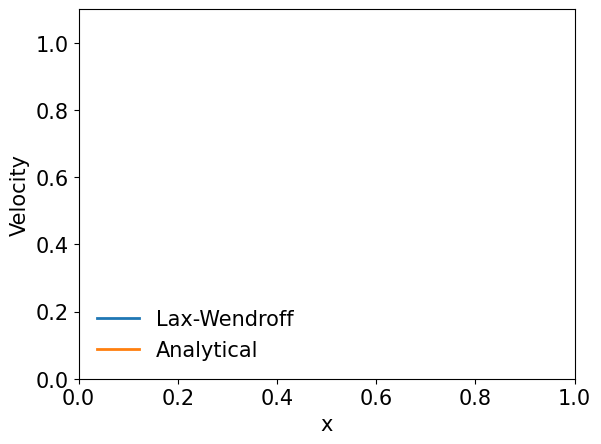

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from scipy import interpolate

LNWDT=2; FNT=15
matplotlib.rcParams['lines.linewidth'] = LNWDT;
matplotlib.rcParams['font.size'] = FNT

def f(x):
    f=np.ones(x.shape)
    f[np.where(x>0.2)] = 0.0

    return f

(xmin, xmax) = (0,1)
n=80  #Number of space intervals

x = np.linspace(xmin,xmax,n+1,'float')
dx = float(xmax-xmin)/n

a=1.0
C=1.0
dt = C*dx/a

(tmin,tmax) = (0, 1.5)

m=round((tmax-tmin)/dt) #Number of temporal intervals
time=np.linspace(tmin,tmax,m)

u0=f(x)
u = np.zeros(u0.shape)
u[:]=u0[:]

ua=np.zeros((len(time),len(u)))
un=np.zeros((len(time),len(u)))

un[0,:] = u0

for i, t in enumerate(time[1:]):

    ua[i,:] = f(x-a*t)

    u_bc = interpolate.interp1d(x[-2:], u[-2:])

    u[1:n] = C*(1+C)/2*u[0:n-1] + (1-C**2)*u[1:n] - C*(1-C)/2*u[2:n+1]

    u[-1] = u_bc(x[-1]-a*dt) # interpolate along a characteristic

    un[i,:] = u[:]


def init():
    for curve in curves:
        curve.set_data([], [])
    return curves,


def animate(i):
    #x = np.linspace(0,4,nx)
    #y = data
    for k, curve in enumerate(curves):
        if (k==0):
            curve.set_data(x,un[i,:])
        else:
            curve.set_data(x, ua[i,:])

    return curves


# Animate the solution
fig = plt.figure()
(ymin,ymax)=(min(f(x)),max(f(x)*1.1))
ax = plt.axes(xlim=(xmin, xmax),ylim=(ymin,ymax));

curve1, = ax.plot(x,u0)
curve2, = ax.plot(x,u0)
legends=['Lax-Wendroff','Analytical']
plt.legend(legends,loc=3,frameon=False)
curves = [curve1, curve2]
plt.xlabel('x')
plt.ylabel('Velocity')
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(time), interval=100, blit=False)
anim.save('plot_advec.png')
plt.show()
